# Viewing STIS NUV Data
## 0. Collect the following data from the MAST Archive: ODGXT9010
Make sure to collect the calibrated data

## 1. Import the necessary libraries:

In [1]:
# Import for: Reading in fits file
from astropy.table import Table
from astropy.io import fits

# Import for: Downloading necessary files. (Not necessary if you choose to collect data from MAST)
from astroquery.mast import Observations

# Import for: Plotting and specifying plotting parameters
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,7)
plt.style.use("bmh")

import numpy as np

## 2. Reading in the data

### 2.1 Investigating the Data - Basics
Before doing any operation on the data, we want to first explore the basics and data file structures.

The Aperture extracted, background subtracted, flux and wavelength calibrated spectra data is stored in fits file with suffix x1d. Open the x1d fits file and explore its info and header.

In [2]:
#NUV
#first read the x1d fits file as a hdu list
x1d_file="./Data/NUV/ODGXT9010/ODGXT9010_x1d.fits"
x1d_hdul = fits.open(x1d_file)

In [3]:
#get information about the fits file
x1d_hdul.info()

Filename: ./Data/NUV/ODGXT9010/ODGXT9010_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     278   ()      
  1  SCI           1 BinTableHDU    156   1R x 19C   [1I, 1I, 1024D, 1024E, 1024E, 1024E, 1024E, 1024E, 1024E, 1024I, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1024E, 1E]   


In [4]:
fits.getheader(x1d_file,0)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS file may contain extensions               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-16' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    1 / Number of extensions                           
FILENAME= 'odgxt9010_x1d.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [5]:
#get data
x1d_data = Table.read(x1d_file,1)
x1d_data

SPORDER,NELEM,WAVELENGTH [1024],GROSS [1024],BACKGROUND [1024],NET [1024],FLUX [1024],ERROR [1024],NET_ERROR [1024],DQ [1024],A2CENTER,EXTRSIZE,MAXSRCH,BK1SIZE,BK2SIZE,BK1OFFST,BK2OFFST,EXTRLOCY [1024],OFFSET
,,Angstroms,Counts/s,Counts/s,Counts/s,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),Counts/s,,pix,pix,pix,pix,pix,pix,pix,pix,pix
int16,int16,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,float32,float32,float32,float32
1,1024,3010.507864169737 .. 3098.557379270491,0.005990227 .. 0.004368662,0.0008788652 .. 0.00641084,0.005111361 .. -0.002042178,2.293795e-15 .. -1.412028e-15,2.211159e-15 .. 1.512657e-15,0.00492722 .. 0.002187716,2580 .. 2564,507.9059,11,1024,5,5,-300,300,520.0425 .. 498.8784,486.687


## 3. Plotting the data
### 3.1 Make a simple plot of the spectrum we just collected and read.

Text(0, 0.5, 'Flux [ergs/s/cm$^2$/$\\AA$]')

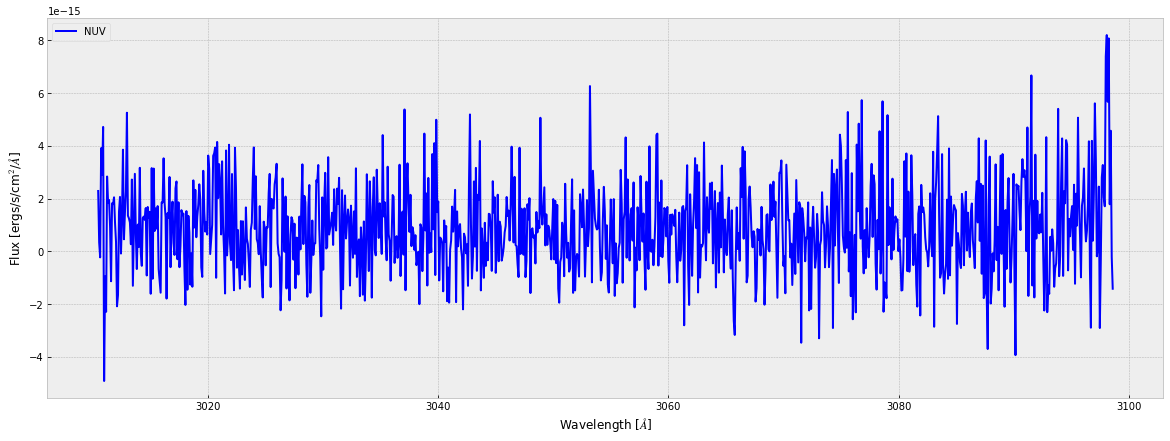

In [6]:
wl = x1d_data["WAVELENGTH"].flatten()
flux = x1d_data["FLUX"].flatten()
order = np.argsort(wl)
wl = np.array(wl)[order]
flux = np.array(flux)[order]
plt.plot(wl, flux, color="blue", label="NUV")
plt.legend(loc="best")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [ergs/s/cm$^2$/$\AA$]")

### 3.2 Make a more complex plot to examine the spectrum in detail.
In this case, we segment the entire spectrum into 5 parts so that we can have a closer look at the flux of each wavelength.

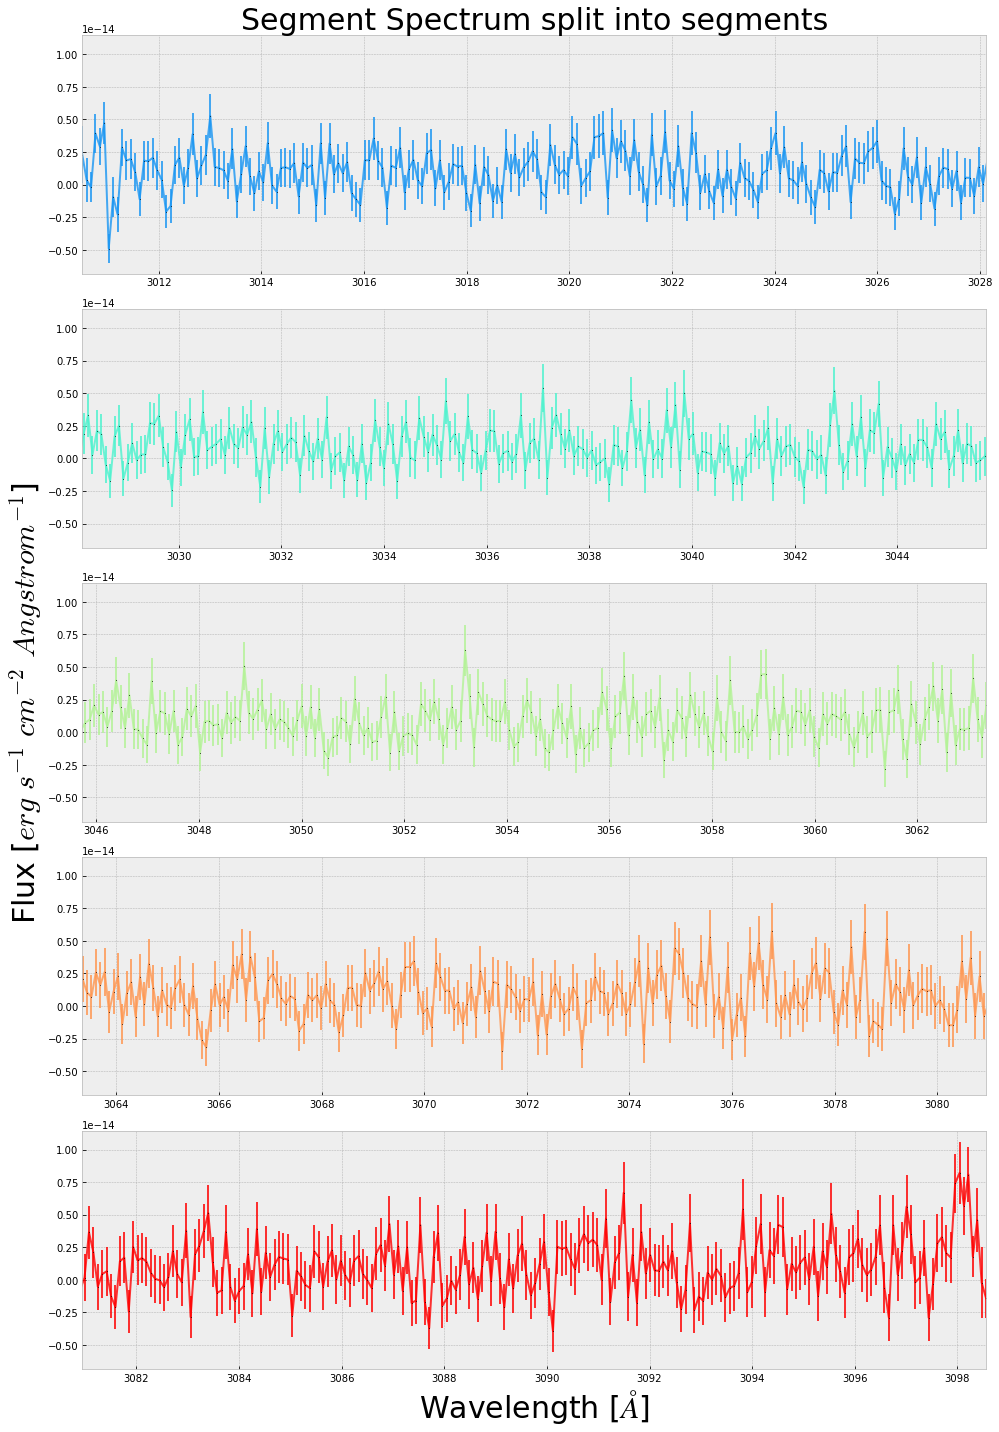

In [7]:
for segment_row in x1d_data:  # Apply the following to each segment's data at a time
    # Selects all immediately useful data for the chosen segment
    wvln= segment_row["WAVELENGTH"]
    flux= segment_row["FLUX"]
    fluxErr = segment_row["ERROR"]
    minx, maxx = min(wvln), max(wvln)
    miny, maxy = min(flux), max(flux)
    rangex = maxx - minx
    fig = plt.figure(figsize=(14, 20))

    nRows = 5  # How many segments we wish to split the spectrum into

    for i in range(nRows):
        min_ = minx + i*rangex/nRows
        max_ = minx + (i+1)*rangex/nRows
        ax = plt.subplot(nRows, 1, i+1)

        if i == 0:  # A way to set Title, xlabel, and ylabel that will work independent of number of rows
            ax.set_title(
                f"Segment Spectrum split into segments", size=30)
        if i == nRows - 1:
            ax.set_xlabel("Wavelength [$\AA$]", size=30)
        if i == int(nRows/2):
            ax.set_ylabel(
                'Flux [$erg\ s^{-1}\ cm^{-2}\ Angstrom^{-1}$]', size=30)

        # Create the plot itself
        ax.errorbar(wvln, flux, fluxErr, c=plt.cm.rainbow((i+1)/nRows), alpha=0.8,
                    marker='.', markerfacecolor='k', markersize=2, mew=0)

        ax.set_xlim(min_, max_)
    plt.tight_layout()
    plt.show()

## 4. STIS NUV Image
### 4.1 Explore image file structure
The rectified, wavelength and flux calibrated first order spectra or Geometrically corrected imaging data is stored in the fits file with the flt extension. Similar to what we did to the x1d file, we first open the fits file to explore its file structure.

In [8]:
#read in the x2d file and get its info
flt_file="./Data/NUV/ODGXT9010/ODGXT9010_flt.fits"
fits.info(flt_file)

Filename: ./Data/NUV/ODGXT9010/ODGXT9010_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     242   ()      
  1  SCI           1 ImageHDU       120   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


- The first, of extension type SCI, stores the science values.
- The second, of extension type ERR, contains the statistical errors, which are propagated through the calibration process. It is unpopulated in raw data files.
- The third, of extension type DQ, stores the data quality values, which flag suspect pixels in the corresponding SCI data. It is unpopulated in raw data files.

Similarly, we can also get the header from this fits file to see the scientific metadata.

In [9]:
fits.getheader(flt_file,0)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-16' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    3 / Number of standard extensions                  
FILENAME= 'odgxt9010_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

### 4.2 Show the image
Now we collect the science image data from the fits file and show the image.

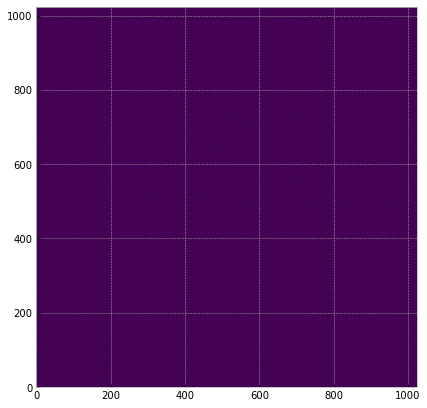

In [10]:
flt_data=fits.open(flt_file)[1].data
plt.imshow(flt_data,origin='lower',vmin=0,vmax=1e2,cmap="viridis")